<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [6]:
import time
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utilities import *
from itertools import combinations

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
ratings = load_data()

# Section 3
## Q1

In [4]:
n = len(ratings.movieId.unique())
m = len(ratings.userId.unique())
sparcity = np.divide(ratings.shape[0], n*m)
display(sparcity)

0.016439141608663475

## Q2

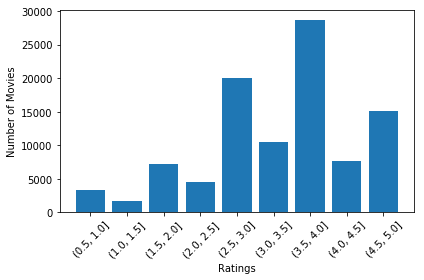

In [5]:
ratings['rating_bin'] = pd.cut(ratings['rating'], bins=np.arange(0.5, 5.5, 0.5))
bar_height = ratings.groupby(['rating_bin']).agg({'rating': 'count'})

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(np.arange(bar_height.shape[0]), bar_height['rating'])
ax.set_xticks(np.arange(bar_height.shape[0]))
ax.set_xticklabels(bar_height.index,rotation=45)
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of Movies')

fig.tight_layout()
fig.savefig('report/figures/q2.png', dpi=300)

## Q3

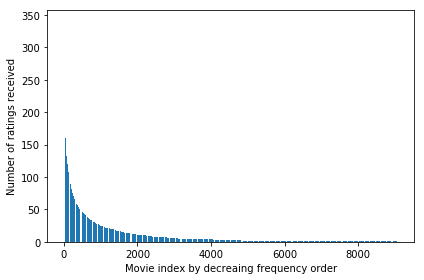

In [6]:
bar_height = ratings.groupby(['movieId']).agg({'rating': 'count'}).\
    rename(columns={'rating': 'rating_count'}).sort_values('rating_count', ascending=False)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(np.arange(bar_height.shape[0]), bar_height.rating_count)
ax.set_xlabel('Movie index by decreaing frequency order')
ax.set_ylabel('Number of ratings received')

fig.tight_layout()
fig.savefig('report/figures/q3.png' dpi=300)

## Q4

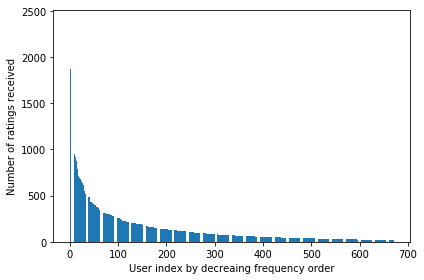

In [7]:
bar_height = ratings.groupby('userId').agg({'rating': 'count'}).\
    rename(columns={'rating': 'rating_count'}).sort_values('rating_count', ascending=False)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(np.arange(bar_height.shape[0]), bar_height.rating_count)
ax.set_xlabel('User index by decreaing frequency order')
ax.set_ylabel('Number of ratings received')

fig.tight_layout()
fig.savefig('report/figures/q4.png', dpi=300)

## Q6

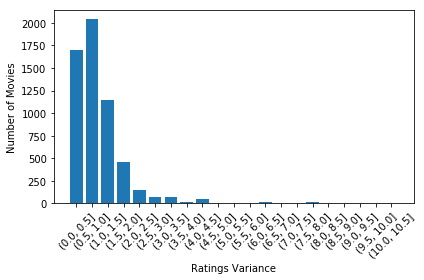

In [23]:
movie_var = ratings.groupby('movieId').agg({'rating': 'var'}).rename(columns={'rating': 'rating_var'}).reset_index()
movie_var['rating_var_bin'] = pd.cut(movie_var.rating_var, bins=np.arange(0, movie_var.rating_var.max()+0.5, 0.5))
bar_height = movie_var.groupby('rating_var_bin').agg({'rating_var': 'count'}).rename(columns={'rating_var': 'count'})

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(np.arange(bar_height.shape[0]), bar_height['count'])
ax.set_xticks(np.arange(bar_height.shape[0]))
ax.set_xticklabels(bar_height.index,rotation=45)
ax.set_xlabel('Ratings Variance')
ax.set_ylabel('Number of Movies')

fig.tight_layout()
fig.savefig('report/figures/q6.png', dpi=300)

# Section 4


## Q7 - Q9

$u_u = \frac{1}{n}\sum_{k \in I_u} r_{uk}$

Movies that have been both rated by user $u$ and user $v$. It could be an empty set.

## Q10
Construct the rating matrix $R \in \textbf{R}^{n\times m}$, with assigning zero values to mean.

In [18]:
# method 1
str_time = time.time()

unique_movie = ratings.movieId.unique()
unique_users = ratings.userId.unique()
user_records = ratings.groupby(['userId'])
mean_ratings = user_records.agg({'rating': 'mean'})
ratin_matrix = mean_ratings.rating.values.reshape(len(unique_users), 1) + np.zeros(len(unique_movie))


print("--- %s seconds ---" % (time.time() - str_time))

--- 0.021029949188232422 seconds ---


In [20]:
pickle.dump(ratin_matrix, open('results/q10-rating_matrix', 'wb'))

In [7]:
# method 2
str_time = time.time()


unique_users = ratings.userId.unique()
user_records = ratings.groupby(['userId'])
mean_ratings = user_records.agg({'rating': 'mean'})
pearson_corr = np.zeros([len(unique_users)]*2)

for (u, v) in combinations(unique_users, 2):
#     mov_in_common = [movie for movie in user_records.get_group(u).movieId if movie in user_records.get_group(v).movieId]  # way too slow
#     r_u_bar = user_record.get_group(u).loc[moe_in_common, rating]
#     pearson_corr[u, v] = 
    pass

print("--- %s seconds ---" % (time.time() - str_time))

--- 0.016516447067260742 seconds ---


## Q15

# Section 5.2

## Q16 - Q23

# Section 5.3

## Q24 - Q 29

# Section 6

## Q30 - Q33

# Section 7

## Q34

# Section 8

## Q35

## Q36

## Q37

## Q38

## Q39